## Baltic Air Freight Index (BAI)

The Baltic Air Freight Index (BAI), published by the Baltic Exchange, is a transaction-based benchmark that tracks air cargo freight rates across major global routes.
Unlike maritime freight indices such as the Baltic Dry Index (BDI), which reflect bulk, low-value trade flows, BAI captures price dynamics in time-sensitive, high-value, and urgent global shipments.

From a macro–quantitative perspective, BAI should be interpreted less as a standalone logistics indicator and more as an environmental variable measuring the “urgency premium” embedded in global supply chains.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tvDatafeed import TvDatafeed, Interval

tv = TvDatafeed()

bai = pd.read_excel(
    '../data/Alter Data.xlsx',
    sheet_name = 'BAI',
    index_col = 0,
    header = [0,1]
)

you are using nologin method, data you access may be limited


The Baltic Air Freight Index (BAI) is not a single homogeneous series.
It is constructed from multiple **directional outbound lanes**, each reflecting air cargo freight rates from a specific origin region to global destinations.

Typical lanes include:
- **BAI00**: Global composite (benchmark aggregate)
- **BAI01–BAI20**: Asia outbound (China, Northeast Asia, Southeast Asia)
- **BAI21–BAI40**: Europe outbound
- **BAI41–BAI60**: North America outbound
- **BAI61–BAI80**: Other regions / long-haul or specialized routes

Each lane embeds **region-specific supply chains**, and therefore carries **distinct industrial information**.

### 1. Linkage with Amazon (AMZN)

Amazon is structurally exposed to the air freight market through cross-border e-commerce, Prime delivery commitments, and its vertically integrated air network (Amazon Air).

- Rising BAI levels typically reflect tighter air cargo capacity, increased cross-border demand, or supply-chain disruptions.
- For AMZN, BAI operates through two simultaneous channels:
  - Demand channel: Higher global e-commerce volumes and faster fulfillment requirements.
  - Cost channel: Elevated air freight rates increasing marginal logistics costs.

As a result, AMZN is best viewed as having **dual exposure** to BAI movements.
Short-term equity responses may be ambiguous, but over medium horizons, BAI serves as a useful proxy for the global e-commerce and consumption cycle.

In [2]:
amzn_price = tv.get_hist(
    symbol = 'AMZN',
    exchange = 'NASDAQ',
    n_bars = 10000,
    interval = Interval.in_daily
)
amzn_price.index = pd.to_datetime(amzn_price.index.strftime('%Y-%m-%d'))

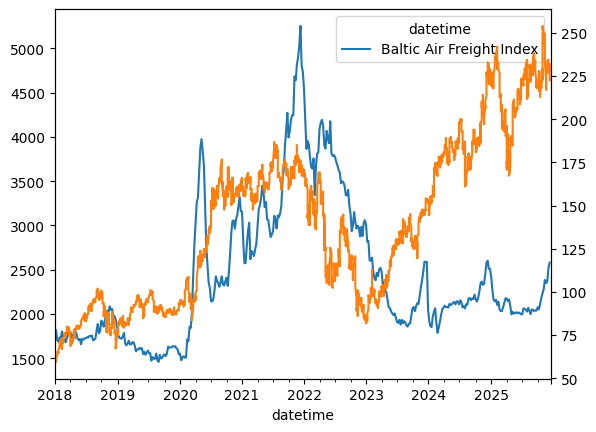

In [3]:
bai['BAI00'].plot()
amzn_price.loc['2018-01-01':, 'close'].plot(secondary_y = True)
plt.show()

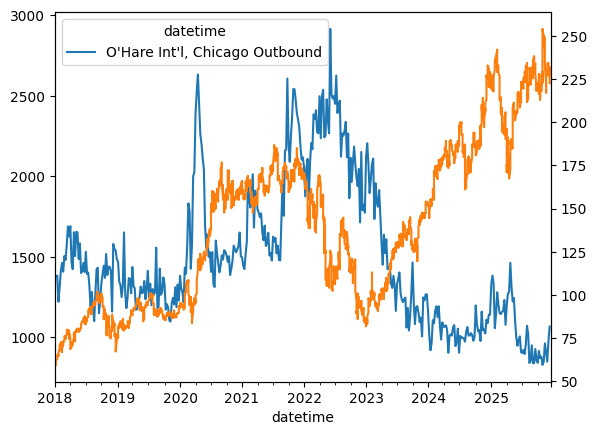

In [4]:
bai['BAI50'].plot()
amzn_price.loc['2018-01-01':, 'close'].plot(secondary_y = True)
plt.show()

### 2. Linkage with FedEx (FDX)

FedEx is directly exposed to air freight dynamics through its global express air network and time-definite international delivery services.

- Rising BAI levels typically indicate tighter air cargo capacity and higher spot freight rates.
- For FDX, BAI affects performance through two opposing channels:
  - Revenue/Yield channel: Capacity tightness can improve pricing power and express shipment yields.
  - Cost/Operating channel: Higher freight rates often coincide with fuel cost pressure and network congestion.

As a result, the linkage between BAI and FDX is **conditional rather than directional**.
In demand-driven tight markets, higher BAI can be supportive for margins, whereas in disruption-driven environments, elevated BAI may signal cost stress.

In [5]:
fdx_price = tv.get_hist(
    symbol = 'FDX',
    exchange = 'NYSE',
    n_bars = 10000,
    interval = Interval.in_daily
)
fdx_price.index = pd.to_datetime(fdx_price.index.strftime('%Y-%m-%d'))

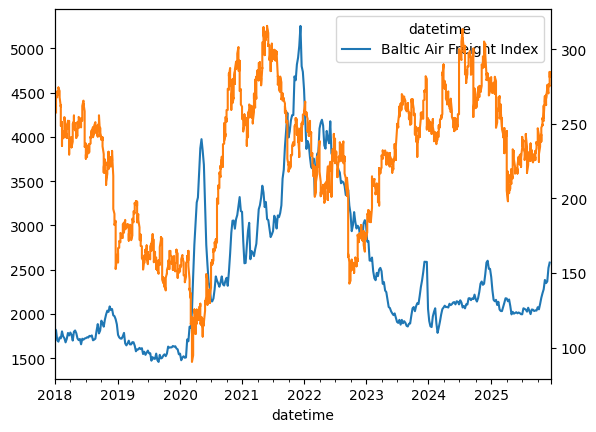

In [6]:
bai['BAI00'].plot()
fdx_price.loc['2018-01-01':, 'close'].plot(secondary_y = True)
plt.show()

### 3. Linkage with the Philadelphia Semiconductor Index (SOX)

Semiconductor production and distribution are highly globalized and rely disproportionately on air freight due to high value-to-weight ratios and tight delivery schedules.

The transmission mechanism can be summarized as:

```
Global IT demand ↑
→ Semiconductor shipments ↑
→ Air freight demand ↑
→ BAI ↑
```

In this sense, the Philadelphia Semiconductor Index (SOX) and BAI tend to behave as co-moving indicators, reflecting common exposure to the global manufacturing and technology cycle rather than a strict lead–lag relationship. BAI spikes often coincide with periods of semiconductor supply tightness, product cycle accelerations, or inventory restocking phases.

In [7]:
sox_index = tv.get_hist(
    symbol = 'SOX',
    exchange = 'TVC',
    n_bars = 10000,
    interval = Interval.in_daily
)
sox_index.index = pd.to_datetime(sox_index.index.strftime('%Y-%m-%d'))

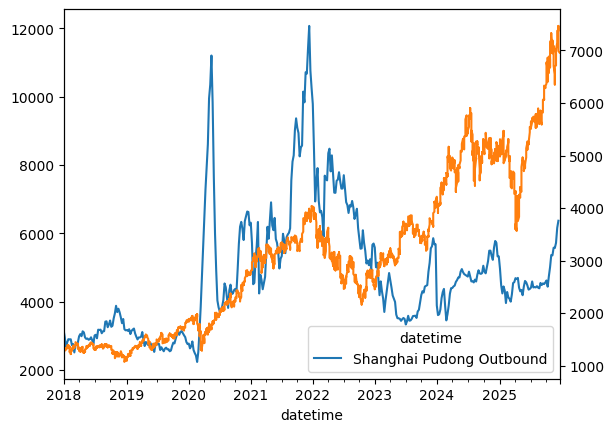

In [8]:
bai['BAI80'].plot()
sox_index.loc['2018-01-01':, 'close'].plot(secondary_y = True)
plt.show()

### 4. Linkage with Biotechnology and Healthcare Indices

The relationship between BAI and healthcare-related equities is **conditional and asymmetric**.

- Strong linkage is observed in segments with high air-freight dependence:
  - Biotechnology products
  - Vaccines and biologics
  - Clinical trial materials
  - Cold-chain pharmaceutical logistics
- Weaker linkage is observed in:
  - Healthcare services
  - Insurance-driven healthcare models
  - Domestic-oriented medical device providers

Consequently, biotechnology-focused indices (e.g., NASDAQ Biotechnology Index) tend to exhibit higher sensitivity to BAI than broad healthcare indices (e.g., XLV).


In [9]:
nbi_index = tv.get_hist(
    symbol = 'NBI',
    exchange = 'NASDAQ',
    n_bars = 10000,
    interval = Interval.in_daily
)
nbi_index.index = pd.to_datetime(nbi_index.index.strftime('%Y-%m-%d'))

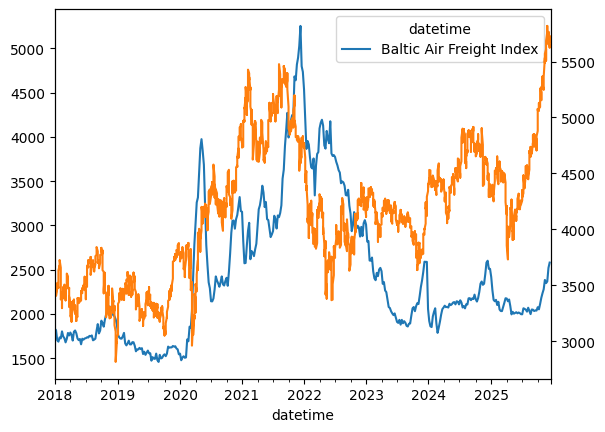

In [10]:
bai['BAI00'].plot()
nbi_index.loc['2018-01-01':, 'close'].plot(secondary_y = True)
plt.show()

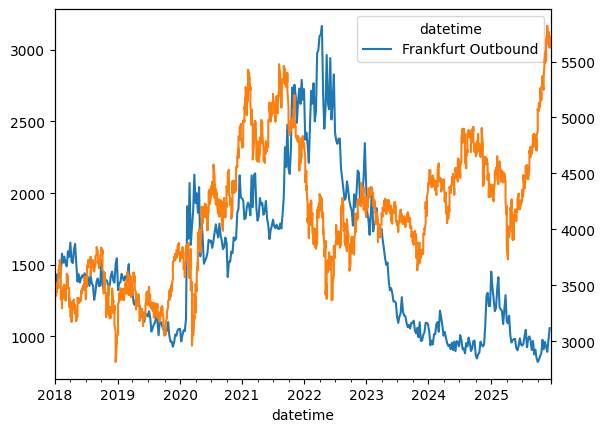

In [11]:
bai['BAI20'].plot()
nbi_index.loc['2018-01-01':, 'close'].plot(secondary_y = True)
plt.show()

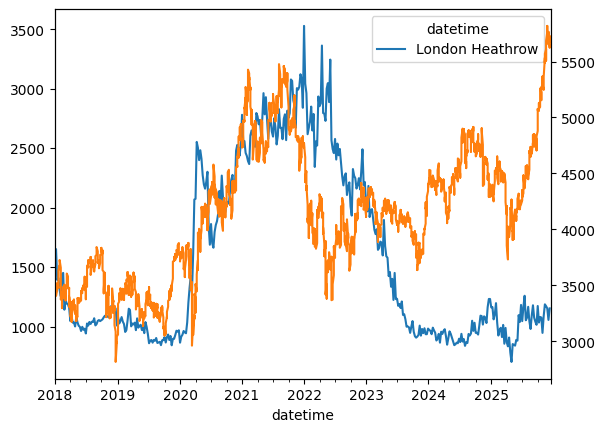

In [12]:
bai['BAI40'].plot()
nbi_index.loc['2018-01-01':, 'close'].plot(secondary_y = True)
plt.show()

### 5. Linkage with the Shenzhen Equity Index (SZSE)

The relationship between BAI80 (Shanghai Pudong Outbound) and the Shenzhen equity index is cyclical and supply-chain driven, with potential lead–lag dynamics rather than a stable contemporaneous correlation.

- Stronger linkage is typically observed when air-freight conditions reflect real export urgency (demand pull) in sectors that are highly represented in Shenzhen:

    - Consumer electronics and components

    - ICT hardware supply chains (semiconductors, modules, connectors)

    - High-value manufacturing and industrial automation

    - Cross-border e-commerce shipping cycles (time-sensitive fulfillment)

- Weaker (or noisy) linkage is typically observed when BAI moves are dominated by logistics-side factors rather than demand:

    - Capacity shocks (belly capacity changes, route disruptions)

    - Peak-season pricing distortions

    - Policy-driven equity moves (liquidity injections, regulatory headlines) that decouple equities from real activity

Consequently, the Shenzhen index tends to be more sensitive to sustained, multi-month uptrends in BAI80 (suggesting persistent export momentum) than to short-lived BAI spikes, and may respond with a lag as earnings expectations and risk premia adjust.

In [13]:
shenzhen = tv.get_hist(
    symbol = '399001',
    exchange = 'SZSE',
    n_bars = 10000,
    interval = Interval.in_daily
)
shenzhen.index = pd.to_datetime(shenzhen.index.strftime('%Y-%m-%d'))

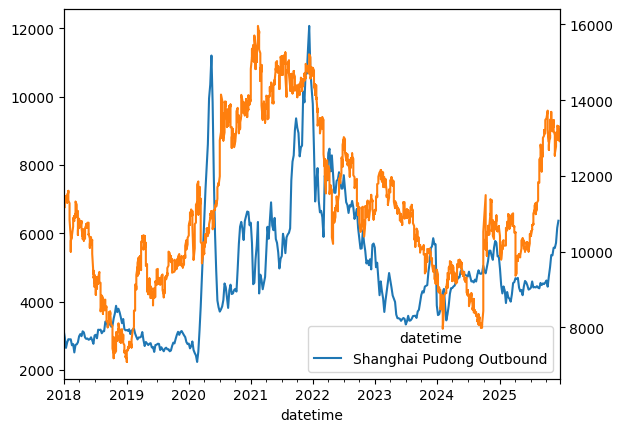

In [14]:
bai['BAI80'].plot()
shenzhen.loc['2018-01-01':, 'close'].plot(secondary_y = True)
plt.show()

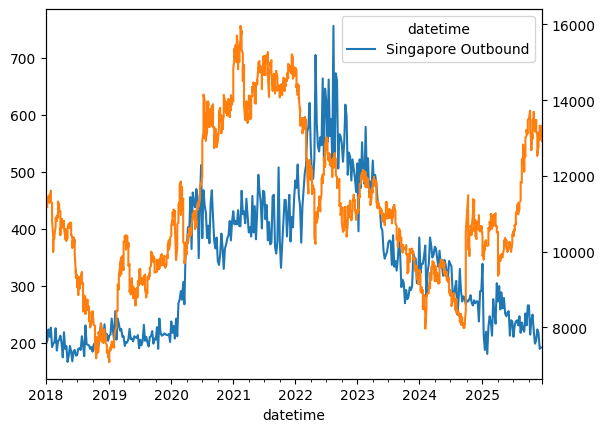

In [15]:
bai['BAI60'].plot()
shenzhen.loc['2018-01-01':, 'close'].plot(secondary_y = True)
plt.show()

### 6. Quantitative Interpretation

From a quantitative modeling standpoint, BAI should not be treated as a universal sector factor.
Instead, it functions more effectively as a **contextual state variable**, conditioning return distributions across sectors.

- During BAI surge regimes:
  - AMZN: Monitor margin sensitivity vs demand acceleration
  - SOX: Distinguish between demand-driven expansion and supply-chain stress
  - Biotechnology: Identify event-driven or logistics-constrained sub-sectors

### Summary

BAI is best understood as a global supply-chain stress and urgency indicator rather than a pure transportation metric.
While AMZN, SOX, and biotechnology equities are all linked to BAI, the transmission mechanisms differ materially, and should be modeled separately in quantitative frameworks.